## 이상치 처리

## box plot 해석

* 5가지 정보를 확인 할 수 있습니다. 
* 최솟값
* 제 1사분위수 - 25%
* 제 2사분위수(), 즉 중앙값
* 제 3 사분위수 -75%
* 최댓값
* 이상치(Outlier) 파악 가능합니다. 

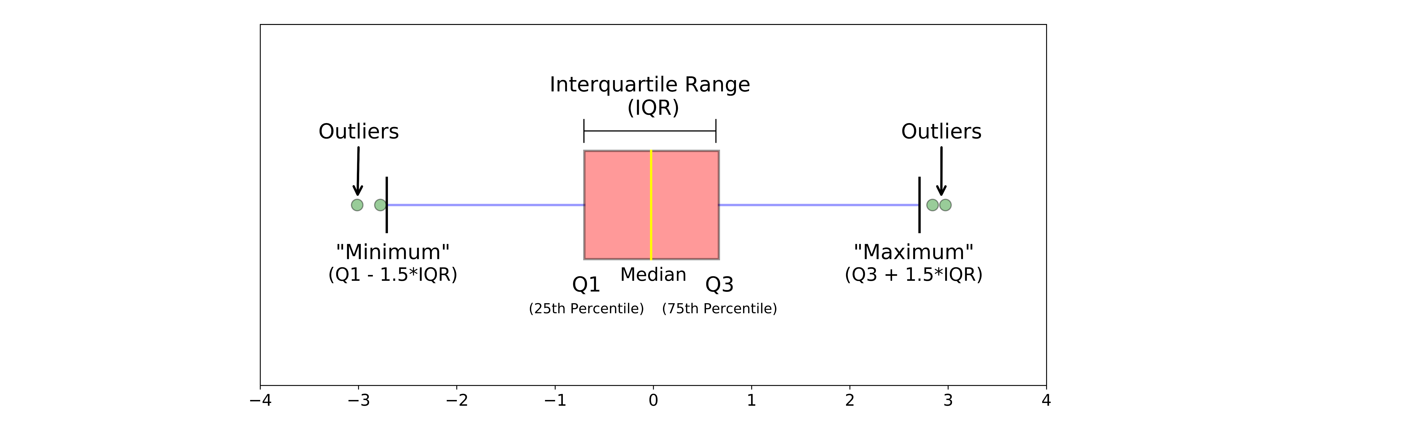

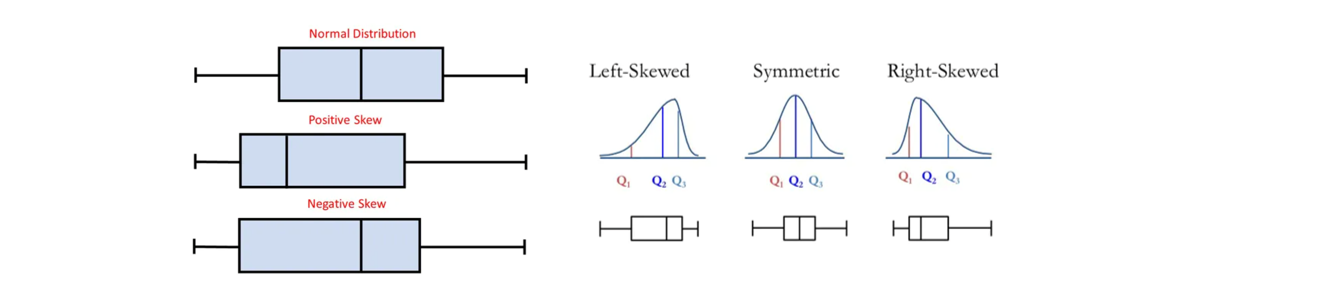

In [1]:
# 필요한 패키지 설치
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
df = pd.read_csv("./data/heart_2020_cleaned.csv")

# 데이터 샘플 확인
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
# BMI 컬럼의 분포 확인

df['BMI'].describe()

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

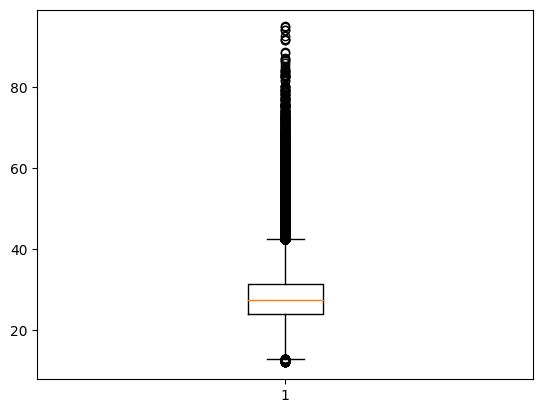

In [5]:
# BMI 컬럼의 박스플롯 시각화를 통한 이상치 확인

plt.boxplot(df['BMI'])
plt.show()

In [7]:
# BMI 컬럼의 이상치 제거 (IQR*3)

# Q!, Q3 범위 정의
Q1 = df['BMI'].quantile(0.25) #1사분위
Q3 = df['BMI'].quantile(0.75) #3사분위
IQR = Q3 - Q1    #IQR 범위. 
rev_range = 3  # 제거 범위 조절 변수 설정/분석가, 도메인 전문가/개발자가 결정할 영역

# 이상치 범위 설정
filter = (df['BMI'] >= Q1 - rev_range * IQR) & (df['BMI'] <= Q3 + rev_range *IQR)
df_rmv = df.loc[filter]
print(df['BMI'].describe())
print(df_rmv['BMI'].describe())

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64
count    318477.000000
mean         28.193173
std           6.010014
min          12.020000
25%          24.020000
50%          27.320000
75%          31.320000
max          53.590000
Name: BMI, dtype: float64


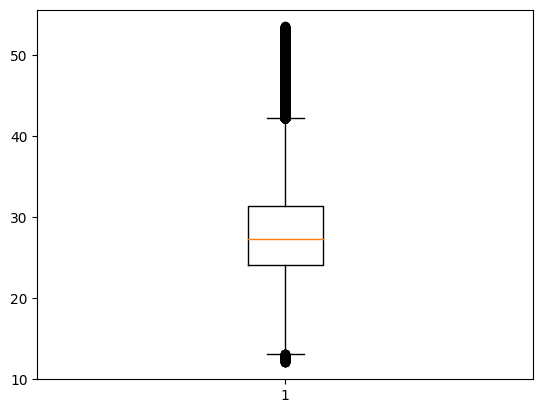

In [8]:
# 이상치 제거 후 박스플롯 시각화


plt.boxplot(df_rmv['BMI'])
plt.show()

## 연습문제

In [9]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

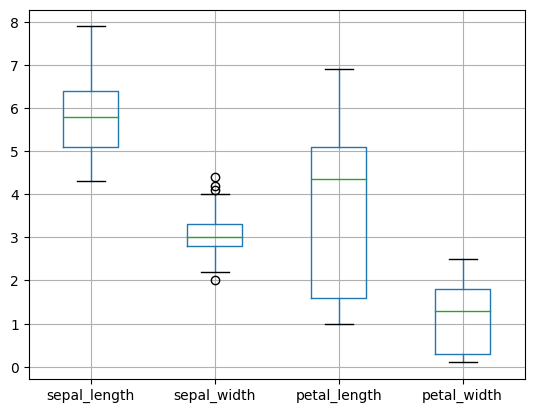

In [11]:
iris.boxplot()

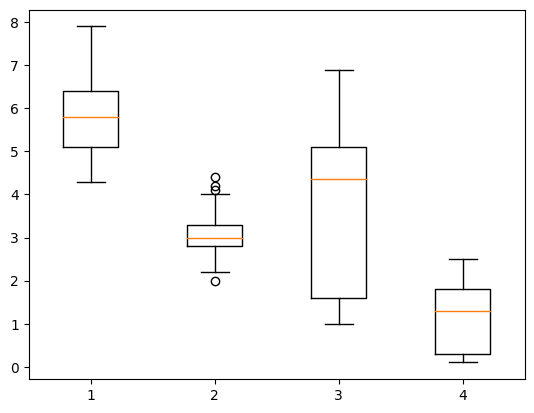

In [12]:
plt.boxplot(iris[['sepal_length','sepal_width','petal_length','petal_width']])
plt.show()

In [19]:
# 모두 제거
# sepal width 컬럼의 이상치 제거 (IQR*3)

# Q!, Q3 범위 정의
Q1 = iris['sepal_width'].quantile(0.25) #1사분위
Q3 = iris['sepal_width'].quantile(0.75) #3사분위
IQR = Q3 - Q1    #IQR 범위. 
rev_range = 1.5  # 제거 범위 조절 변수 설정/분석가, 도메인 전문가/개발자가 결정할 영역

# 이상치 범위 설정
filter = (iris['sepal_width'] >= Q1 - rev_range * IQR) & (iris['sepal_width'] <= Q3 + rev_range *IQR)
iris_rmv = iris.loc[filter]
print(iris['sepal_width'].describe())
print(iris_rmv['sepal_width'].describe())

count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64
count    146.000000
mean       3.040411
std        0.397853
min        2.200000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.000000
Name: sepal_width, dtype: float64


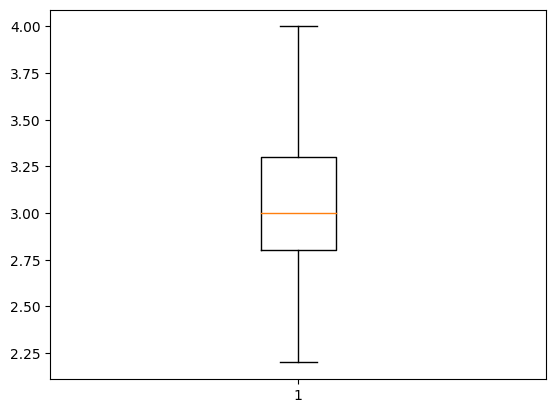

In [20]:
# 이상치 제거 후 박스플롯 시각화


plt.boxplot(iris_rmv['sepal_width'])
plt.show()

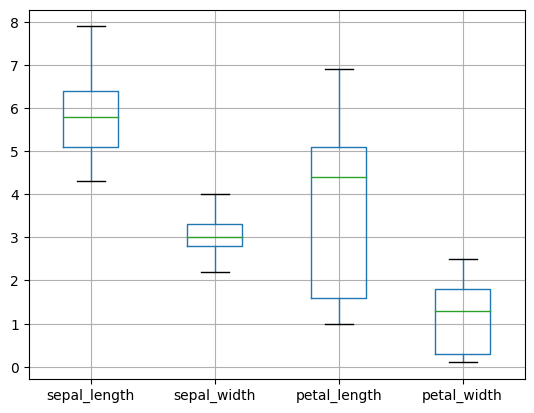

In [48]:
iris_rmv.boxplot()
plt.show()

## 타이터닉 데이터에 대해 이상치를 제거 하시오.

In [21]:
titanic = sns.load_dataset('titanic')

In [22]:
# 이상치 있는 피처 찾기: age, sibsp, parch, fare
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

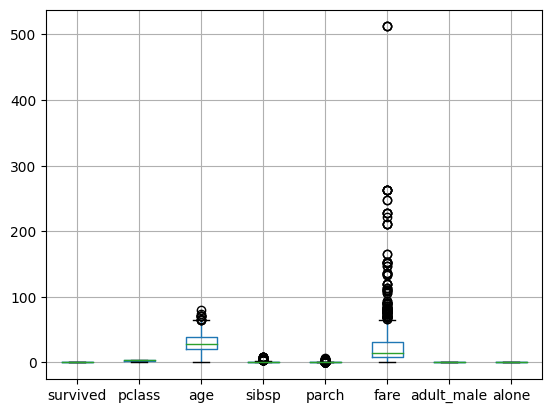

In [23]:
titanic.boxplot()

In [24]:
# 이상치가 보이지만 80세가 이상치는 아니기 때문에 수용함!!!
# 해당 피처에 대한 이상치 제거: age
# 모두 제거
# age 컬럼의 이상치 제거 (IQR*3)

# Q!, Q3 범위 정의
Q1 = titanic['age'].quantile(0.25) #1사분위
Q3 = titanic['age'].quantile(0.75) #3사분위
IQR = Q3 - Q1    #IQR 범위. 
rev_range = 1.5  # 제거 범위 조절 변수 설정/분석가, 도메인 전문가/개발자가 결정할 영역

# 이상치 범위 설정
filter = (titanic['age'] >= Q1 - rev_range * IQR) & (titanic['age'] <= Q3 + rev_range *IQR)
titanic_rmv = titanic.loc[filter]
print(titanic['age'].describe())
print(titanic_rmv['age'].describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64
count    703.000000
mean      29.072077
std       13.728478
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       64.000000
Name: age, dtype: float64


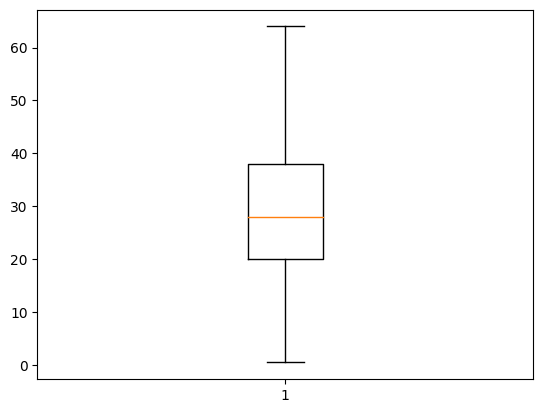

In [25]:
# 제거 후의 분포 시각화
plt.boxplot(titanic_rmv['age'])
plt.show()

In [26]:
# 이 역시 이상치로 파악하기는 어려워!
# 해당 피처에 대한 이상치 제거: sibsp
# 모두 제거
# sibsp 컬럼의 이상치 제거 (IQR*3)

# Q!, Q3 범위 정의
Q1 = titanic['sibsp'].quantile(0.25) #1사분위
Q3 = titanic['sibsp'].quantile(0.75) #3사분위
IQR = Q3 - Q1    #IQR 범위. 
rev_range = 1.5  # 제거 범위 조절 변수 설정/분석가, 도메인 전문가/개발자가 결정할 영역

# 이상치 범위 설정
filter = (titanic['sibsp'] >= Q1 - rev_range * IQR) & (titanic['sibsp'] <= Q3 + rev_range *IQR)
titanic_rmv = titanic.loc[filter]
print(titanic['sibsp'].describe())
print(titanic_rmv['sibsp'].describe())

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: sibsp, dtype: float64
count    845.000000
mean       0.313609
std        0.530909
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: sibsp, dtype: float64


<Axes: >

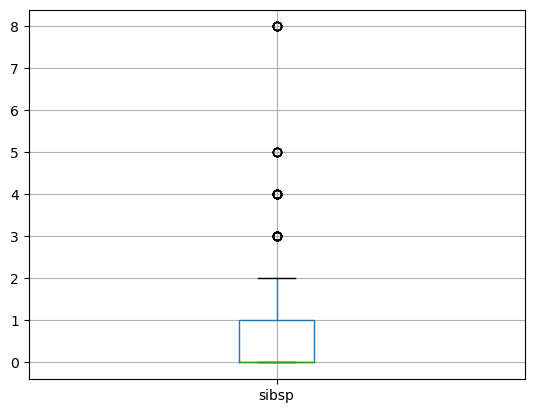

In [50]:
titanic[['sibsp']].boxplot()

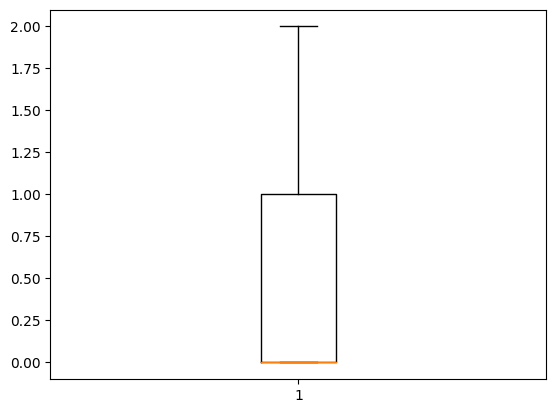

In [27]:
# 제거 후의 분포 시각화
plt.boxplot(titanic_rmv['sibsp'])
plt.show()

In [34]:
# 큰 문제 없어서 패스!

# 해당 피처에 대한 이상치 제거: parch
# 모두 제거
# parch 컬럼의 이상치 제거 (IQR*3)

# Q!, Q3 범위 정의
Q1 = titanic['parch'].quantile(0.25) #1사분위
Q3 = titanic['parch'].quantile(0.75) #3사분위
IQR = Q3 - Q1    #IQR 범위. 
rev_range = 1  # 제거 범위 조절 변수 설정/분석가, 도메인 전문가/개발자가 결정할 영역

# 이상치 범위 설정
filter = (titanic['parch'] >= Q1 - rev_range * IQR) & (titanic['parch'] <= Q3 + rev_range *IQR)
titanic_rmv = titanic.loc[filter]
print(titanic['parch'].describe())
print(titanic_rmv['parch'].describe())

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: parch, dtype: float64
count    678.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: parch, dtype: float64


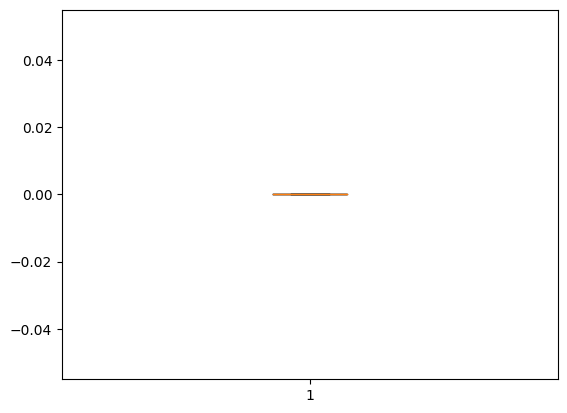

In [35]:
# 제거 후의 분포 시각화
plt.boxplot(titanic_rmv['parch'])
plt.show()

In [51]:
# 해당 피처에 대한 이상치 제거: fare
# 모두 제거
# fare 컬럼의 이상치 제거 (IQR*3)

# Q!, Q3 범위 정의
Q1 = titanic['fare'].quantile(0.25) #1사분위
Q3 = titanic['fare'].quantile(0.75) #3사분위
IQR = Q3 - Q1    #IQR 범위. 
rev_range = 6  # 제거 범위 조절 변수 설정/분석가, 도메인 전문가/개발자가 결정할 영역

# 이상치 범위 설정
filter = (titanic['fare'] >= Q1 - rev_range * IQR) & (titanic['fare'] <= Q3 + rev_range *IQR)
titanic_rmv = titanic.loc[filter]
print(titanic['fare'].describe())
print(titanic_rmv['fare'].describe())

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64
count    871.000000
mean      26.530170
std       29.351184
min        0.000000
25%        7.895800
50%       13.862500
75%       30.000000
max      164.866700
Name: fare, dtype: float64


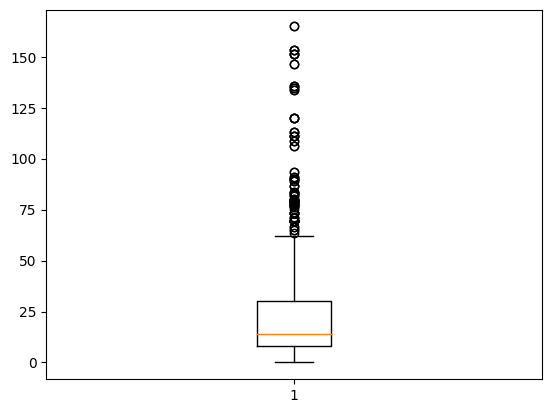

In [52]:
# 제거 후의 분포 시각화
plt.boxplot(titanic_rmv['fare'])
plt.show()